## 고객의 소비등급별 인사이트 발굴

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np

In [2]:
# pd.set_option('display.max_rows', None)
# pd.options.display.max_rows = 60
pd.set_option('display.max_columns', None)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

### Raw data 탐색 (불필요한 컬럼 제외 및 null값 처리)

In [3]:
df = pd.read_csv('new_retail_data.csv')
df[:5]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [4]:
# 분석에 불필요한 컬럼 제외 (이름, 이메일주소, 전화번호, 주소, 우편번호)
df_notnull = df.drop(columns=['Name', 'Email', 'Phone', 'Address', 'Zipcode'])
df_notnull[:5]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
print(df_notnull['Age'].dtype)

float64


In [5]:
# 결측치 처리 : 데이터형이 float64 이면 0.0으로 치환, 나머지는 Unknown으로 치환
cols = df_notnull.columns.to_list()
for col in cols:
    if df_notnull[col].dtype == 'float64':
        df_notnull[col].fillna(0.0, inplace=True)
    else:
        df_notnull[col].fillna('Unknown', inplace=True)

/tmp/ipykernel_6120/3796784937.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_notnull[col].fillna(0.0, inplace=True)
/tmp/ipykernel_6120/3796784937.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [6]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    302010 non-null  float64
 1   Customer_ID       302010 non-null  float64
 2   City              302010 non-null  object 
 3   State             302010 non-null  object 
 4   Country           302010 non-null  object 
 5   Age               302010 non-null  float64
 6   Gender            302010 non-null  object 
 7   Income            302010 non-null  object 
 8   Customer_Segment  302010 non-null  object 
 9   Date              302010 non-null  object 
 10  Year              302010 non-null  float64
 11  Month             302010 non-null  object 
 12  Time              302010 non-null  object 
 13  Total_Purchases   302010 non-null  float64
 14  Amount            302010 non-null  float64
 15  Total_Amount      302010 non-null  float64
 16  Product_Category  30

In [7]:
df_notnull[df_notnull['City'] == 'Unknown'][:5]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
30903,5695172.0,65712.0,Unknown,England,UK,22.0,Male,High,Regular,4/13/2023,2023.0,April,20:56:39,6.0,28.185125,169.110749,Clothing,Adidas,Jacket,Average,Standard,PayPal,Delivered,2.0,Peacoat
34227,2344287.0,35757.0,Unknown,North Carolina,USA,22.0,Female,Low,Regular,9/7/2023,2023.0,September,6:16:25,4.0,167.815723,671.262893,Home Decor,Home Depot,Tools,Excellent,Same-Day,PayPal,Delivered,4.0,Utility knife
36340,6311279.0,69037.0,Unknown,Arkansas,USA,22.0,Male,High,Regular,3/6/2023,2023.0,March,3:25:55,8.0,259.063949,2072.511594,Grocery,Coca-Cola,Soft Drink,Average,Standard,PayPal,Delivered,2.0,Orange soda
36701,6364411.0,97562.0,Unknown,New South Wales,Australia,22.0,Female,Low,Regular,1/29/2024,2024.0,January,23:41:03,6.0,397.515059,2385.090356,Books,HarperCollins,Non-Fiction,Excellent,Same-Day,Debit Card,Delivered,4.0,Psychology
38608,2001432.0,48237.0,Unknown,England,UK,22.0,Male,High,Regular,5/1/2023,2023.0,May,3:28:14,1.0,81.243538,81.243538,Grocery,Coca-Cola,Soft Drink,Average,Standard,Debit Card,Delivered,2.0,Ginger ale


In [8]:
# 데이터형변환 float64 --> int64
df_notnull = df_notnull.astype({'Transaction_ID': 'int', 'Customer_ID': 'int', 'Age': 'int', 'Year': 'int'})
df_notnull.dtypes

Transaction_ID        int64
Customer_ID           int64
City                 object
State                object
Country              object
Age                   int64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                  int64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [9]:
# Transaction_ID: 거래 ID
df_notnull[:3]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [10]:
# 컬럼 이름 변경
df_notnull.rename(columns={'Transaction_ID': 'Transaction_ID(구매번호)',
                           'Customer_ID': 'Customer_ID(고객번호)',
                           'City': 'City(시)',
                           'State': 'State(주)',
                           'Country': 'Country(국가)',
                           'Age': 'Age(나이)',
                           'Gender': 'Gender(성별)',
                           'Income': 'Income(소득수준)',
                           'Customer_Segment': 'Customer_Segment(소비등급)',
                           'Date': 'Date(구매날짜)',
                           'Year': 'Year(연도)',
                           'Month': 'Month(월)',
                           'Time': 'Time(시간)',
                           'Total_Purchases': 'Total_Purchases(총구매수)',
                           'Amount': 'Amount(금액)',
                           'Total_Amount': 'Total_Amount(총구매금액)',
                           'Product_Category': 'Product_Category(카테고리)',
                           'Product_Brand': 'Product_Brand(브랜드)',
                           'Product_Type': 'Product_Type(상품유형)',
                           'Feedback': 'Feedback(피드백)',
                           'Shipping_Method': 'Shipping_Method(배송방법)',
                           'Payment_Method': 'Payment_Method(결제방법)',
                           'Order_Status': 'Order_Status(주문상태)',
                           'Ratings': 'Ratings(평점)',
                           'products': 'products(상품명)'}, inplace=True)

In [11]:
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [13]:
df_notnull[df_notnull['Age(나이)'] == 0][:5]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
232,3601539,93979,Portsmouth,England,UK,0,Female,Low,Regular,1/9/2024,2024,January,8:44:51,10.0,32.115559,321.155591,Grocery,Coca-Cola,Water,Average,Same-Day,Credit Card,Pending,2.0,Bottled water
575,7443430,28320,Portsmouth,England,UK,0,Female,High,Regular,10/20/2023,2023,October,3:59:07,9.0,211.259930,1901.339367,Grocery,Nestle,Snacks,Average,Same-Day,Cash,Processing,2.0,Beef jerky
22330,3565814,32816,Frankfurt,Berlin,Germany,0,Female,Low,New,8/16/2023,2023,August,18:33:56,1.0,84.572575,84.572575,Clothing,Nike,Shoes,Good,Same-Day,PayPal,Delivered,4.0,High heels
168555,1147230,99092,Essen,Berlin,Germany,0,Female,Medium,New,7/12/2023,2023,July,17:47:14,8.0,161.980816,1295.846525,Home Decor,IKEA,Decorations,Good,Express,Cash,Delivered,3.0,Decorative pillows
169403,1348389,97823,Oklahoma City,South Carolina,USA,0,Female,Medium,New,2/16/2024,2024,July,17:20:51,8.0,313.652977,2509.223814,Grocery,Coca-Cola,Soft Drink,Average,Same-Day,Cash,Delivered,2.0,Cola


In [14]:
# 수정된 데이터프레임을 csv 파일로 저장
df_notnull.to_csv('./new_retail_data_notnull.csv', index=False)

### 매출 분석(1)

In [4]:
df_notnull = pd.read_csv('new_retail_data_notnull.csv')
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [5]:
# 결측치 및 데이터형 확인
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction_ID(구매번호)    302010 non-null  int64  
 1   Customer_ID(고객번호)       302010 non-null  int64  
 2   City(시)                 302010 non-null  object 
 3   State(주)                302010 non-null  object 
 4   Country(국가)             302010 non-null  object 
 5   Age(나이)                 302010 non-null  int64  
 6   Gender(성별)              302010 non-null  object 
 7   Income(소득수준)            302010 non-null  object 
 8   Customer_Segment(소비등급)  302010 non-null  object 
 9   Date(구매날짜)              302010 non-null  object 
 10  Year(연도)                302010 non-null  int64  
 11  Month(월)                302010 non-null  object 
 12  Time(시간)                302010 non-null  object 
 13  Total_Purchases(총구매수)   302010 non-null  float64
 14  Amount(금액)          

In [9]:
# df_notnull[df_notnull['Date(구매날짜)'] != 'Unknown']
df_notnull[df_notnull['Year(연도)'] == 0]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
99,9823195,14549,Portsmouth,England,UK,62,Female,Medium,Regular,11/8/2023,0,November,17:08:17,4.0,104.506337,418.025349,Books,Penguin Books,Fiction,Excellent,Express,Cash,Processing,5.0,Literary fiction
1478,4936631,23030,Portsmouth,England,UK,21,Male,High,Regular,3/25/2023,0,March,4:23:34,6.0,405.502990,2433.017938,Electronics,Apple,Laptop,Average,Standard,Cash,Pending,2.0,Razer Blade
1714,4281330,46723,Portsmouth,England,UK,21,Male,High,Regular,8/31/2023,0,August,11:06:31,3.0,279.306652,837.919957,Grocery,Pepsi,Soft Drink,Good,Standard,Cash,Processing,4.0,Fruit punch
1891,8190326,18666,Portsmouth,England,UK,21,Male,Medium,Regular,10/22/2023,0,October,15:09:26,6.0,328.990235,1973.941410,Electronics,Sony,Headphones,Excellent,Express,Debit Card,Shipped,4.0,Gaming headphones
3931,9338987,32128,Portsmouth,England,UK,21,Female,Medium,Regular,4/11/2023,0,April,6:28:34,9.0,186.023186,1674.208672,Electronics,Apple,Tablet,Excellent,Standard,Debit Card,Processing,4.0,Amazon Fire Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297250,9719846,62505,Munich,Berlin,Germany,34,Female,Low,Regular,2/14/2024,0,February,0:41:09,4.0,10.357410,41.429640,Books,Penguin Books,Fiction,Excellent,Express,Credit Card,Processing,4.0,Dystopian
297293,2336634,63382,Fort Worth,Vermont,USA,42,Female,Medium,Regular,7/17/2023,0,July,14:33:58,3.0,11.125645,33.376935,Electronics,Samsung,Smartphone,Bad,Express,Credit Card,Pending,1.0,Nokia
297953,3117917,43644,Perth,New South Wales,Australia,42,Female,Medium,New,6/30/2023,0,June,11:17:04,1.0,35.593755,35.593755,Grocery,Coca-Cola,Juice,Average,Express,Credit Card,Pending,2.0,Cranberry juice
298663,1374555,90389,Columbus,Texas,USA,69,Male,Medium,Regular,11/20/2023,0,November,2:23:55,2.0,350.673770,701.347540,Clothing,Adidas,T-shirt,Excellent,Express,Credit Card,Pending,5.0,Crop top


In [10]:
# 소비등급 확인
df_notnull['Customer_Segment(소비등급)'].unique()

array(['Regular', 'Premium', 'New', 'Unknown'], dtype=object)

In [11]:
# 소비등급 별 매출 확인
df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().sort_values('Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Customer_Segment(소비등급),
Regular,1.999656e+08
New,1.245976e+08
Premium,8.767392e+07
Unknown,3.285013e+05


Text(0.5, 1.0, '소비등급별 총 구매금액')

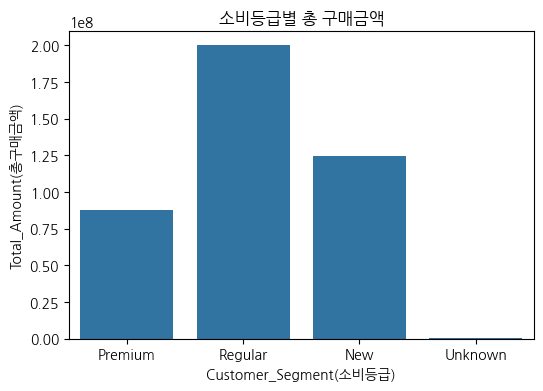

In [14]:
# 소비등급 별 매출 시각화
a = df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=a, x="Customer_Segment(소비등급)", y="Total_Amount(총구매금액)", order=['Premium', 'Regular', 'New', 'Unknown'])
plt.title('소비등급별 총 구매금액')

In [15]:
# 소비등급 별 최대 구매수 확인
b = df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Purchases(총구매수)']].max().reset_index()
b

,Customer_Segment(소비등급),Total_Purchases(총구매수)
0,New,10.0
1,Premium,10.0
2,Regular,10.0
3,Unknown,10.0


In [23]:
pd.merge(left=a, right=b, on='Customer_Segment(소비등급)', how='outer')

,Customer_Segment(소비등급),Total_Amount(총구매금액),Total_Purchases(총구매수)
0,New,1.245976e+08,10.0
1,Premium,8.767392e+07,10.0
2,Regular,1.999656e+08,10.0
3,Unknown,3.285013e+05,10.0


AttributeError: Line2D.set() got an unexpected keyword argument 'order'

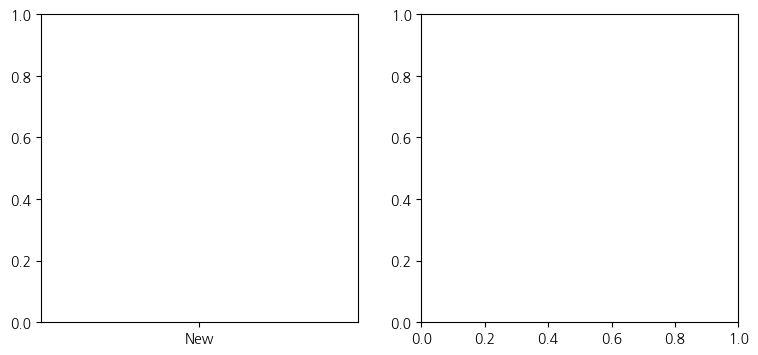

In [28]:
c = pd.merge(left=a, right=b, on='Customer_Segment(소비등급)', how='outer')

fig, axes = plt.subplots(figsize=(9, 4), ncols=2, nrows=1)
sns.lineplot(data=c, x='Customer_Segment(소비등급)', y='Total_Purchases(총구매수)', ax=axes[0],
             order=['Premium', 'Regular', 'New', 'Unknown'])
sns.barplot(data=c, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)', ax=axes[1],
            order=['Premium', 'Regular', 'New', 'Unknown'])

plt.tight_layout()
plt.show()

소비등급이 Premium 인 고객들의 구매금액이 가장 많을 줄 알았는데, Regular 인 고객들의 구매 금액이 가장 높게 나왔다.\
기간을 설정을 안해서 그런가? ... Regular 고객들의 구매금액이 가장 높게 나온 근거가 무엇인지, 그에 반해 Premium 고객들의 구매 형태는 어떠했는지 알아보고자 한다.

In [84]:
# 소비등급이 Regular인 사람들의 데이터
regular = df_notnull[df_notnull['Customer_Segment(소비등급)'] == 'Regular'].reset_index().iloc[:, 1:]
regular[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
2,8493213,19136,Portsmouth,England,UK,64,Female,Low,Regular,7/20/2023,2023,July,23:06:51,4.0,90.981870,363.927479,Home Decor,Home Depot,Tools,Average,Standard,Credit Card,Shipped,2.0,Screwdriver set


In [12]:
# 소비등급이 Regular인 사람들의 평점
regular.groupby(['Ratings(평점)'])[['Ratings(평점)']].count()

,Ratings(평점)
Ratings(평점),
0.0,117
1.0,24453
2.0,32741
3.0,22840
4.0,44405
5.0,21665


In [13]:
# 소비등급이 Regular인 사람들의 나이별 총 구매금액
regular.groupby(['Age(나이)'])[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)[:5]

,Total_Amount(총구매금액)
Age(나이),
22,2.853114e+07
26,2.485344e+07
23,1.839983e+07
20,1.533136e+07
46,1.434075e+07


In [14]:
regular['Income(소득수준)'].unique()

array(['Low', 'Medium', 'High', 'Unknown'], dtype=object)

In [15]:
regular.groupby('Income(소득수준)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)[:5]

,Total_Amount(총구매금액)
Income(소득수준),
Medium,8.591920e+07
High,6.230327e+07
Low,5.159566e+07
Unknown,1.474737e+05


In [16]:
regular.groupby('Gender(성별)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Gender(성별),
Male,1.269958e+08
Female,7.276368e+07
Unknown,2.060937e+05


총구매금액이 가장 많은 소비등급이 'Regular'인 사람들은\
평점을 4점으로 준 경우가 많았던 것으로 보아 대부분 소비에 만족했고, 다음으로는 평점을 2점으로 준 경우가 많았다.\
22세의 소비가 가장 많았고, 다음으로 26세, 23세, 20세, 46세 순으로 20대의 소비가 가장 많은 것으로 보인다.\
또한 소득수준이 Medium인 사람들의 소비가 가장 많았으며, 다음으로 High, Low 순이었다.\
여성보다 남성의 경우가 소비를 더 많이 하는 것으로 보인다.

In [17]:
print(len(df_notnull['Age(나이)'].unique()))
df_notnull['Age(나이)'].unique()

54


array([21, 19, 48, 56, 22, 58, 29, 46, 25, 64, 31, 53, 32, 43, 69, 49, 61,
       41, 38, 59, 20, 67, 50, 26, 66, 24, 54, 28, 34, 65, 40, 68, 36, 57,
       27, 35, 70, 37, 30, 39, 47, 18, 60, 33, 62, 42, 44, 51, 63, 55, 23,
       52,  0, 45])

In [18]:
np.min([21, 19, 48, 56, 22, 58, 29, 46, 25, 64, 31, 53, 32, 43, 69, 49, 61,
41, 38, 59, 20, 67, 50, 26, 66, 24, 54, 28, 34, 65, 40, 68, 36, 57,
27, 35, 70, 37, 30, 39, 47, 18, 60, 33, 62, 42, 44, 51, 63, 55, 23,
52, 45])

np.int64(18)

In [19]:
regular_gender = pd.pivot_table(data=df_notnull, values='Total_Amount(총구매금액)', index='Age(나이)', columns='Gender(성별)', aggfunc='sum').reset_index().iloc[:, :3]
regular_gender

Gender(성별),Age(나이),Female,Male
0,0,1.007448e+05,1.374986e+05
1,18,7.549663e+05,1.153340e+06
2,19,8.533706e+06,1.295121e+07
3,20,1.814228e+07,2.782324e+07
4,21,4.493319e+06,6.625852e+06
5,22,1.265226e+07,1.891162e+07
6,23,9.869788e+06,1.475621e+07
7,24,3.423195e+06,5.101368e+06
8,25,1.441221e+06,2.122088e+06
9,26,4.842396e+06,2.863266e+07


In [20]:
more = []
for i in range(len(regular_gender)):
    if regular_gender['Female'][i] > regular_gender['Male'][i]:
        more.append('Female')
    else:
        more.append('Male')

regular_gender['More'] = more
regular_gender[:3]

Gender(성별),Age(나이),Female,Male,More
0,0,1.007448e+05,1.374986e+05,Male
1,18,7.549663e+05,1.153340e+06,Male
2,19,8.533706e+06,1.295121e+07,Male


In [21]:
print(len(regular_gender[regular_gender['More'] == 'Female']))
print(len(regular_gender[regular_gender['More'] == 'Male']))

0
54


### 매출 분석(2) 0704~

In [3]:
df_notnull = pd.read_csv('new_retail_data_notnull.csv')
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,99071,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,75929,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [15]:
# Year(연도) 값이 0인 경우 Date(구매날짜) 컬럼 값에서 연도 값을 가져와 치환
for i in range(len(df_notnull)):
    if df_notnull['Year(연도)'][i] == 0:
        df_notnull['Year(연도)'][i] = int(df_notnull['Date(구매날짜)'][i][-4:])

df_notnull[df_notnull['Year(연도)'] == 0]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)


In [11]:
df_notnull['Year(연도)'].unique()

array([2023, 2024])

In [5]:
# 소비등급이 Regular인 사람들의 데이터
regular = df_notnull[df_notnull['Customer_Segment(소비등급)'] == 'Regular'].reset_index().iloc[:, 1:]
regular[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,6679610,30192,Geelong,New South Wales,75929,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
2,8493213,19136,Portsmouth,England,59280,UK,64,Female,Low,Regular,7/20/2023,2023,July,23:06:51,4.0,90.981870,363.927479,Home Decor,Home Depot,Tools,Average,Standard,Credit Card,Shipped,2.0,Screwdriver set


In [6]:
# 소비등급 Regular인 사람들의 국가별, 주별 매출비교
regular.groupby('Country(국가)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Country(국가),
USA,6.530286e+07
UK,4.921060e+07
Germany,3.503005e+07
Australia,2.533955e+07
Canada,2.496077e+07
Unknown,1.217768e+05


In [7]:
regular.groupby('State(주)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)[:10]

,Total_Amount(총구매금액)
State(주),
England,4.918889e+07
Berlin,3.502733e+07
New South Wales,2.534971e+07
Ontario,2.494669e+07
Maine,1.578138e+07
Georgia,1.227098e+07
Connecticut,9.848760e+06
Kansas,3.699103e+06
Florida,5.746273e+05


In [40]:
# 연도별, 월별 매출 비교
# regular.groupby(['Year(연도)', 'Month(월)'])[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)
# pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Month(월)', aggfunc='sum')
regular_ym = pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Month(월)', aggfunc='sum')
regular_ym

Year(연도),2023,2024
Month(월),,
April,2.030994e+07,1.656965e+06
August,1.756684e+07,1.105872e+06
December,1.221538e+07,1.323900e+04
February,1.423491e+05,1.137028e+07
January,1.873655e+07,1.576458e+07
July,2.273092e+07,2.075015e+06
June,1.161749e+07,3.965774e+04
March,1.231856e+07,3.432232e+04
May,1.573510e+07,7.146992e+05


In [42]:
regular_ym.iloc[:, :1].sort_values(by=(2023), ascending=False)[:3]

Year(연도),2023
Month(월),
July,2.273092e+07
April,2.030994e+07
January,1.873655e+07


In [43]:
regular_ym.iloc[:, 1:].sort_values(by=(2024), ascending=False)[:3]

Year(연도),2024
Month(월),
January,1.576458e+07
February,1.137028e+07
July,2.075015e+06


In [12]:
# df_notnull[df_notnull['Year(연도)'] == 0]
df_notnull[df_notnull['Date(구매날짜)'] == 'Unknown']

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
3921,2771549,59548,Portsmouth,England,68989,UK,21,Female,Medium,Regular,Unknown,2023,November,18:14:15,1.0,292.031675,292.031675,Home Decor,Home Depot,Furniture,Average,Standard,Credit Card,Delivered,2.0,Dining table
4342,2632074,93647,Portsmouth,England,24000,UK,24,Male,Medium,Regular,Unknown,2023,July,3:05:25,7.0,338.715576,2371.009032,Books,HarperCollins,Non-Fiction,Bad,Express,Debit Card,Pending,1.0,Psychology
5135,3349514,71021,Portsmouth,England,47239,UK,24,Female,Medium,Regular,Unknown,2023,July,14:01:47,7.0,249.679524,1747.756665,Clothing,Nike,Shorts,Bad,Standard,PayPal,Shipped,1.0,Cargo shorts
5231,4043499,17605,Portsmouth,England,36062,UK,24,Male,Medium,Regular,Unknown,2023,June,6:13:33,7.0,302.073805,2114.516634,Home Decor,IKEA,Lighting,Bad,Standard,Credit Card,Pending,1.0,Recessed lighting
6857,9686043,16259,Portsmouth,England,72778,UK,24,Male,Medium,Regular,Unknown,2023,October,14:08:34,5.0,231.726948,1158.634738,Electronics,Apple,Tablet,Good,Express,Debit Card,Delivered,4.0,Sony Xperia Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297935,4204783,22912,Tulsa,Oregon,97625,USA,50,Male,Low,Regular,Unknown,2023,December,21:14:27,7.0,93.545264,654.816847,Grocery,Nestle,Snacks,Excellent,Express,Credit Card,Delivered,5.0,Granola bars
298792,2742967,57511,Essen,Berlin,82263,Germany,24,Female,High,Regular,Unknown,2023,April,3:31:42,8.0,213.317274,1706.538194,Home Decor,Home Depot,Decorations,Bad,Express,Credit Card,Shipped,1.0,Rugs
298832,6673065,83349,Bristol,England,10611,UK,63,Male,Medium,Premium,Unknown,2023,March,23:47:49,4.0,476.360238,1905.440951,Books,Random House,Fiction,Good,Express,Credit Card,Pending,4.0,Romance
300441,7126641,61813,Manchester,England,88333,UK,35,Female,Low,Premium,Unknown,2024,February,20:30:33,5.0,325.208673,1626.043364,Books,Random House,Literature,Excellent,Express,Credit Card,Shipped,4.0,Short stories


In [13]:
# 상품별 매출비교
pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Product_Category(카테고리)', aggfunc='sum')

Year(연도),2023,2024
Product_Category(카테고리),,
Books,3.036783e+07,5.997828e+06
Clothing,3.046509e+07,5.772087e+06
Electronics,4.075244e+07,8.066116e+06
Grocery,3.491757e+07,6.966978e+06
Home Decor,3.043808e+07,6.040161e+06
Unknown,1.489702e+05,3.245823e+04


In [25]:
# 브랜드별 매출비교
regular_brand = pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Product_Brand(브랜드)', aggfunc='sum')
regular_brand

Year(연도),2023,2024
Product_Brand(브랜드),,
Adidas,1.009628e+07,2.002374e+06
Apple,9.864383e+06,1.929227e+06
Bed Bath & Beyond,1.039326e+07,2.087936e+06
BlueStar,8.244586e+05,1.797543e+05
Coca-Cola,1.017548e+07,2.016731e+06
HarperCollins,9.979041e+06,2.096644e+06
Home Depot,9.931823e+06,2.065768e+06
IKEA,1.009714e+07,1.887507e+06
Mitsubhisi,2.506599e+06,4.533317e+05


In [35]:
regular_brand.iloc[:, :1].sort_values(by=(2023), ascending=False)

Year(연도),2023
Product_Brand(브랜드),
Pepsi,1.465529e+07
Bed Bath & Beyond,1.039326e+07
Random House,1.025221e+07
Zara,1.023822e+07
Samsung,1.020926e+07
Coca-Cola,1.017548e+07
Nike,1.013034e+07
Penguin Books,1.012915e+07
Sony,1.012020e+07


In [38]:
regular_brand.iloc[:, 1:].sort_values(by=(2024), ascending=False)

Year(연도),2024
Product_Brand(브랜드),
Pepsi,2.904519e+06
HarperCollins,2.096644e+06
Samsung,2.091340e+06
Bed Bath & Beyond,2.087936e+06
Home Depot,2.065768e+06
Nestle,2.035031e+06
Coca-Cola,2.016731e+06
Random House,2.013152e+06
Adidas,2.002374e+06


In [44]:
# 피드백 별 총 구매금액 비교
regular[:1]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.08627,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts


In [46]:
regular.groupby('Feedback(피드백)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Feedback(피드백),
Good,6.226417e+07
Excellent,5.873705e+07
Average,4.521163e+07
Bad,3.359182e+07
Unknown,1.609373e+05
